# **Práctica 2: clasificación de dígitos MNIST mediante AdaBoost**

# Introducción

En esta segunda practica tenemos que desarrollar un sistema capaz de distinguir y clasificar una serie de digitos manuscritos, para lograr este cometido usaremos un algoritmo de aprendizaje automatico supervisado.

En este tipo de algoritmos lo que tenemos que hacer es entrenar el sistema a través de unos datos de entrada para su entrenamiento, de manera que al pasarle una nueva imagen pueda clasificarla e indicarnos a que digito pertenece.

# **Machine Learning**

Antes de meternos de lleno en el desarrollo del algoritmo, me gustaría hablar un poco del Machine Learning, ML a partir de ahora, como hemos visto en clase el ML es una disciplina dentro del ámbito de la Inteligencia Artificial, el cual tiene como objetivo crear sistemas que aprendan y funcionen de manera automática. Lo que un sistema realmente **"aprende"** es un algoritmo para realizar una funcionalidad, este algoritmo analiza unos datos de entrada y es capaz de predecir acciones futuras basándonos en esos datos. La ventaja de usar estos sistemas es que a medida que pasa el tiempo mejora su rendimiento debido a que aprenden de una forma más eficiente.

Hay otros tipos de aprendizajes como puede ser el Deep Leaning, una pregunta que nos debemos hacer es, ¿qué tipo de aprendizaje se adapta mejor a nuestro problema, el Machine Learning o el Deep Learning? La respuesta dependerá de varios factores, pero hay dos que son muy relevantes, el tamaño del conjunto de entrenamiento y la potencia de cómputo de la máquina en la que estemos desarrollando el algoritmo, Deep Learning necesita una cantidad inmensa de datos mientras que ML no, por otra parte, la potencia de cálculo necesaria para llevar a cabo un algoritmo de Deep Learning es mayor que la necesaria para Machine Learning, por lo que, en pocas palabras para un problema como el nuestro que es relativamente sencillo, el tipo de aprendizaje para nuestro problema es el aprendizaje supervisado, ya que nosotros conocemos la clase a la que cada imagen pertenece, es decir, vamos a aprender basándonos en ejemplos conocidos.

Los ejemplos de nuestro conjunto de entrenamiento los dividiremos en dos, el conjunto de entrenamiento real y el conjunto de validación, el primero nos servirá para entrenar como su nombre indica, mientras que el segundo nos servirá para sacar el porcentaje de error y acierto que tiene nuestro algoritmo. Tenemos que entrenar hasta que el error que nos da el algoritmo sea lo suficientemente aceptable, también tenemos que tener en cuenta en no sobre entrenar el algoritmo, esto lo podemos averiguar fijándonos en la tasa de error, ya que a medida que más entrenemos podrá llegar un punto en el que la tasa de acierto comience a degradarse, esto en la práctica producirá que el algoritmo funcione muy bien para un número de imágenes determinado, mientras que para nuevas imágenes podría fallar.

# Boosting

Esta técnica la hemos estudiado en clase, **Boosting** se define como un método de *ensemble*, que usan muchos clasificadores (*learners*) para mejorar el desempeño que tendrían cada uno de estos de manera individual, estos métodos se describen como técnicas que implican el uso de un grupo de clasificadores débiles (*weak learners*) de manera conjunta, de forma que podremos crear un clasificador fuerte (*strong learner*).

**Boosting**, conocido inicialmente como *Hypothesis Boosting*, consiste en la idea de generar un sistema de predicción altamente preciso combinando muchos sistemas más simples e imprecisos. Realizando esto, hacemos que nuestro modelo aprenda a hacer predicciones precisas para cualquier tipo de datos. A nuestro sistema tenemos que entrenarlo con una cantidad de datos relativamente grande, cada clasificador débil que generemos tendrá en cuenta el clasificador generado con anterioridad, es decir, las predicciones que haga un clasificador se tendrán en cuenta para las predicciones que lleven a cabo futuros clasificadores, esto se logra mediante una distribución de probabilidad que nos indica como de difícil es clasificar un ejemplo, por lo que, si un ejemplo es complejo de clasificar tendrá más peso en futuras iteraciones.

Con todo esto, lo que generamos es un conjunto de clasificadores débiles que formaran un clasificador fuerte, cada clasificador tendrá un peso a la hora de realizar la hipótesis de pertenencia a una clase, por lo que se puede dar el caso que tengamos algunos clasificadores débiles que sean malos, pero esto no tiene mucha relevancia, ya que lo compensaran los demás clasificadores que formen el conjunto.

Boosting no debe de confundirse con **Bagging**, que es otro referente en lo que se refiere a metodos de ensamblado, mientras que en *Bagging* los clasificadores débiles se entrenan en paralelo usando el azar, en *Boosting* estos clasificadores son entrenados de manera secuencial para conseguir lo que hemos explicado con anterioridad.

Algunos conceptos que tenemos que tener en cuenta son el **bias** y la **varianza**, por una parte, el bias indica como se aleja nuestro modelo de la realidad, es decir, como de bien se aproxima lo que genera el modelo con la realidad. Por otra parte, la varianza indica que tan sensible es nuestro modelo a los datos de entrenamiento. Explicado estos conceptos, se nos presentan cuatro posibles escenarios, que la varianza sea alta o baja y que el bias sea alto o bajo, el escenario ideal es cuando la varianza es baja y el bias el bajo, es significa que nuestras predicciones son cercanas, esto se traduce en que nuestro modelo predice bien para cualquier tipo de datos que le pasemos.

Una vez tenemos claros los conceptos anteriores, tenemos que tener en cuenta que el uso de un método de *ensamblado* ayudará a reducir el bias y la varianza. Esto será debido a que Boosting funciona de manera que un clasificador débil tiene en cuenta los anteriores, esto se ha explicado con anterioridad, al final los clasificadores que mejor clasificadores tendrán más peso cuando queramos una hipótesis para un dato cualquiera.

# **AdaBoost**

**Adaptative Boosting**, mejor conocido como *AdaBoost*, es uno de los algoritmos de Boosting más empleados, fue introducido en 1999 y supuso un avance muy importante en diversos campos ya que permitio aplicar la estrategia explicada anteriormente para muchos problemas.

El pseudocodigo del algoritmo es el siguiente:

<img src= "https://drive.google.com/uc?export=view&id=1H7mFUdOxgP4-D24v1OmnIhmsW8FdzPoD" >

Vemos que recibimos dos variables por parametros, X e Y, la X hace referencia al conjunto de entrenamiento mientras que la Y hace referencia a las etiquetas de cada imagen.

Luego, tenemos la variable D que se trata de un vector que nos indica como de dificil es clasificar una imagen, al inicio todas las imagenes tienen el mismo peso. Este peso se irá actualizando conforme generemos clasificadores.

Luego tenemos dos variables muy importantes, T y A, la T nos indicará el número de *clasificadores débiles* que formarán nuestro *clasificador fuerte*, mientras que la A nos indica cuantos clasificadores débiles generamos en cada iteración para quedarnos con el mejor clasificador débil, entendemos a un clasificador débil como el que menos error tiene.

Ahora que tenemos claro esas variables podemos comenzar por lo relevante, en una primera instancia realizaremos un bucle que nos generará T clasificadores débiles para formar el fuerte, en cada iteración generamos A clasificadores débiles y nos quedamos con el mejor, cuando generamos un clasificador débil en el segundo bucle, este estará compuesto de tres componentes al azar, un pixel de la imagen, un umbral y una dirección. Una vez hemos generado el clasificador tenemos que calcular su error, esto se basa en aplicar el clasificador a todo el conjunto de entrenamiento.




Vamos a explicar en que consiste aplicar el clasificador, como he mencionado antes hemos generado 3 valores, basándose en esos valores tenemos que comprobar lo siguiente, si la dirección es positiva miramos en la parte positiva del plano, y lo que hacemos es comprobar si el pixel indexado en la imagen es mayor que el umbral del clasificador, si se cumple entonces la predicción de nuestro clasificador es positiva, es decir ha acertado, si no se cumple entonces es negativa, es decir ha fallado. Por otro lado, si la dirección en negativa miramos en la otra parte del plano, entonces verificamos que el pixel indexado en la imagen es menor que el umbral de nuestro clasificador, si se cumple entonces la predicción es positiva, si no, será negativa.

Ya sabemos como funciona el aplicar el clasificador para cada imagen, entonces continuando con el calculo del error, tenemos que recorrer todo el conjunto de entrenamiento, en cada iteración calculamos la predicción para cada imagen, si la predicción es distinta de la etiqueta real entonces el error de dicho clasificador aumenta en base al peso de la posicion i-esima del vector D.

Una vez ha iterado las A veces nos quedaremos con el mejor clasificador, es decir, el que menos error tenga de todos. Ahora tenemos que calcular la confianza de este clasificador.


Tras el calculo de la confianza, tenemos que actualizar los pesos del vector D, cada posición se actualizará en base a si se ha clasicado bien o mal, por lo que las imagenes mal clasificadas tendrán un mayor peso en futuras iteraciones, también tendremos que dividir entre Z, que es la suma del vector D, para normalizar las muestras, es decir, que tengan un valor más normal.

Todo esto lo realizaremos T veces, hasta tenemos los clasificadores necesarios para formar nuestro clasificador fuerte, cuanto mayor sea A y T más tardaremos en entrenar el módelo.

Una vez tenemos nuestro clasificador fuerte podemos probar su funcionamiento, es decir, dada una imagen nos permitirá indicar si pertenece a una clase o no, basicamente lo que tenemos que hacer es recorremos todos los clasificadores debiles y los aplicamos a esa imagen, el resultado de cada clasificador se multiplica por la confianza que tiene, este valor se va acumulando, una vez hemos terminado de iterar vemos que signo tiene, es decir, si la acumulación es mayor que 0 entonces la imagen pertenece a la clase, si es menor, no pertenece.

# **Implementación**

## **Importar librerías**

En primer lugar, tenemos que importar las librerías necesarias para que nuestro proyecto funcione de la manera correcta.

* Numpy: Esta librería nos servirá para tratar con números dentro de matrices o vectores, haciendo que su rendimiento mejore.
* Matplot: Esta librería la emplearemos para generar gráficas  de los resultados principalmente.
* Keras: La emplearemos para descargar de manera dinamica la base de datos de MNIST para entrenar y probar la eficiencia de nuestro modelo.
* Random: La usaremos para generar números aleatorios de los clasificadores débiles.
* Math: Se empleará para realizar cálculos matemáticos.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
import random
import math
from tqdm import tqdm 

Desde la libería de Keras podemos descargar la base datos MNIST, podemos ver que cargamos dos conjuntos, el de entrenamiento y el de test, principalmente usaremos el de entrenamiento.

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Guardar base de datos en un fichero

In [ ]:
np.savez("mnist",x=x_train,y=y_train)

Cargar base de datos desde un fichero

In [ ]:
npzfile = np.load("mnist.npz")
mnist_X = npzfile['x']
mnist_Y = npzfile['y']

## **Adaptación de conjuntos**

Una vez hemos descargado el conjunto de entrenamiento tenemos que adaptarlo para que funcione con nuestro programa, la lista MNIST_X cuenta con 60000 imágenes, cada imagen es una matriz, la adaptación consiste en que esa matriz se convierta en un vector de ancho * alto, si sabemos que el ancho y el alto de cada imagen es constante, es decir, es 28, sabemos que el vector estará compuesto por 784 posiciones.

Para el mnist_Y no tenemos que tocar nada ya que esto representa las etiquetas de cada imagen, solo tendremos que adaptarlo más adelante.

In [ ]:
def adaptar_conjuntos(mnist_X, mnist_Y):
  X = mnist_X.reshape(60000, 28*28)
  Y = mnist_Y
  return (X, Y)

## **Clasificadores débiles**

### **Genera Clasificador Débil**

Ya hemos explicado con anterioridad lo que es un clasificador debil, ahora procedemos a generarlo, como he explicado en el punto interior cada imagen será un vector de 784 posiciones, por lo que generaremos un pixel al azar entre 0 y ese valor, lo usaremos en un futuro, también generemos un valor entre 0 y 255, ya que estamos usando imagenes en escala de grises, finalmente generamos un valor entre dos opciones, -1 y 1, -1 hace referencia al plano negativo y 1 al plano positivo.

In [ ]:
# Dimensión con la que vamos a trabajar. En nuestro caso 28*28
def generar_clasificador_debil(dimension_datos):
  clasificador = []
  clasificador.append(random.randint(0, dimension_datos-1))
  clasificador.append(random.randint(0, 255))
  clasificador.append(random.choice([-1, 1]))

  return clasificador

#Prueba
print(generar_clasificador_debil(784))

[483, 54, 1]


### **Aplicar Clasificador Débil**

Cuando tenemos el clasificador débil generado, podemos realizar distintas cosas, por ejemplo aplicar el clasificador débil a una imagen, como he explicado anteriormente, nos fijamos en la direccion que hemos generado al azar, y luego comparamos el pixel al azar de la imagen con el umbral al azar, dependiendo de si se cumple o no, la predicción será positiva (1) o negativa (-1).

In [ ]:
#Tenemos que fijarnos en la direccion, y ver si el pixel es mayor o menor
def aplicar_clasificador_debil(clasificador, imagen):
  pixel = clasificador[0]
  umbral = clasificador[1]
  dir = clasificador[2]
  if dir == 1:
    if imagen[pixel] > umbral:
      return 1
    else:
      return -1
  elif dir == -1:
    if imagen[pixel] < umbral:
      return 1
    else:
      return -1

### **Obtener error del clasificador**

Para obtener el error del clasificador es muy sencillo, esta función recibe el conjunto de imágenes X, las etiquetas Y, el vector de pesos y el clasificador.

El error se obtiene recorriendo todo el vector de imagenes, en cada iteración aplicamos el clasificador a la imagen, luego el resultado de la predicción lo comparamos con la etiqueta real, si es igual pasamos a la siguiente imagen, si no es igual aumentamos el error en el valor de la posición i-esima del vector D.

In [ ]:
#Iteramos sobre el conjunto de imagenes, si falla la prediccion con la etiqueta
#iesima, aumentamos el error
def obtener_error(clasificador, X, Y, D):
  fallo = 0.0

  i = 0
  for img in X:
    if aplicar_clasificador_debil(clasificador, img) != Y[i]:
      fallo += D[i]
    i += 1
  return fallo

## **AdaBoost**

### **Explicación General**

Ya hemos explicado anteriormente el funcionamiento de AdaBoost, algo a destacar es que A y T se las pasamos por parametro, también contamos con una lista de clasificadores débiles y otra para las confianzas.

Inicializamos el vector D con los pesos de cada imagen, en un inicio será 1 / el tamaño del conjunto de entreanamiento.

Cuando queremos quedarnos con el minimo error, lo haremos de la forma en la que lo haciamos en asignaturas más basicas de la carrera, esto no supone ningun reto.

En lo que se refiere al error minimo, se podría dar el caso en el que el error sea cero, si esto se cumple el error lo caparemos a un valor muy bajo como 0.00001 por ejemplo, también comprobaremos cuando el error sea mayor o igual a 1, en este caso lo caparemos a 0.99999.

En lo que se respecta a lo demás es igual a lo que hemos comentado con anterioridad, tendremos que ir añadiendo la confianza y el mejor clasificador a cada vector.

In [ ]:
def adaboost(X, Y, T, A):
  clasificadores_debiles = []
  alphas = []
  tam = len(X)
  D = np.ones(tam) * 1/tam

  for t in range(T):

    err_min = 1.1
    cd_min = None
    #Obtenemos el que menos error tenga
    for i in range(A):
      cd = generar_clasificador_debil(784)
      err = obtener_error(cd, X, Y, D)
      if err < err_min:
        err_min = err
        cd_min = cd
    
    #Caso en el que hay que capar el error
    if err_min == 0:
      err_min = 0.00001
    
    if err_min >= 1:
      err_min = 0.99999

    #Obtenemos la confianza
    alpha = 0.5 * (np.log2((1-err_min)/err_min))

    #Actualizar Dt
    Z = 0
    for i in range(tam):
      pred = aplicar_clasificador_debil(cd_min, X[i]) * Y[i]
      D[i] *= math.pow(math.e, -alpha * pred)
    
    for i in range(tam):
      Z += D[i]

    #Ahora normalizamos
    for i in range(tam):
      D[i] = D[i] / Z
    
    #Añadimos el mejor clasificador y su confianza en los respectivos vectores
    clasificadores_debiles.append(cd_min)
    alphas.append(alpha)

  return (clasificadores_debiles, alphas)

### **Cálculo de la Hipotesis**

Para el cálculo de la hipotesis del clasificador fuerte se tienen que emplear los T clasificadores débiles que forman el fuerte y su respectiva confianza.

Para calcularlo para una imagen se emplea la siguiente funcion. Su funcionamiento sigue el de la formula del pseudocodigo, basicamente tenemos que recorrer los T clasificadores debiles, en cada iteración vamos acumulando el resultado de multiplicar la predicción del clasificador débil por su confianza. Al final devolvemos el signo, es decir, si el resultado es mayor que cero devolvemos 1, por el contrario, si es menor o igual a 0 devolvemos -1.

In [ ]:
def aplicarClasificadorFuerte_Imagen(img, debiles, alphas):
    sum = 0
    for i, ht in enumerate(debiles):
        sum += alphas[i] * aplicar_clasificador_debil(ht, img)
    
    return np.sign(sum)

In [ ]:
def aplicarClasificadorFuerte_Conjunto(cf, imgs, labels):
    [debiles, alphas] = cf
    valores = []
    for i in range(len(imgs)):
      valores.append(aplicarClasificadorFuerte_Imagen(imgs[i], debiles, alphas))
    
    tasa_aciertos = 0
    for i, val in enumerate(valores):
      if val == labels[i]:
        tasa_aciertos += 1
    tasa_aciertos = np.round(tasa_aciertos/len(imgs) * 100, 2)
    return tasa_aciertos

## **Conjuntos de Entrenamiento**

### **División del conjunto**

El conjunto de entrenamiento que descargamos de manera dinámica desde MNIST lo podemos en dos subconjuntos, el conjunto de entrenamiento con el que de verdad entrenaremos y el conjunto de validación con el que después podemos usar para calcular la tasa de acierto y error.

La división la haremos indicando un porcentaje, este parámetro lo podremos ajustar para obtener una mayor eficiencia.

In [ ]:
def dividirConjunto(mnist_X, mnist_Y, porcentaje):
    N = len(mnist_X)
    train_p = int(porcentaje * N)
    
    #Sacamos el conjunto de entrenamiento
    imageTrain = mnist_X[:train_p]
    labelTrain = mnist_Y[0:train_p]

    #Sacamos el conjunto de validación
    imageTest = mnist_X[train_p:N]
    labelTest = mnist_Y[train_p:N]

    return (imageTrain, labelTrain, imageTest, labelTest)


### **Creación del conjunto de entrenamiento**

Para crear un conjunto de entrenamiento para un número le pasaremos el conjunto de entrenamiento que hemos separado con anterioridad, ahora el objetivo es crear un conjunto para entrenar un número concreto, mi idea es coger el número de imagenes que haya del digito a entrenar, eso formará el 50% del conjunto de entrenamiento, el otro 50% lo formará una cantidad igual de números pero que no sean el digito a entrenar.

Esta función nos permitirá sacar los conjuntos tanto para el entrenamiento como el test.

In [ ]:
def creaConjunto(mnist_X, mnist_Y, numero):
  repeticiones = np.count_nonzero(mnist_Y == numero)

  imagenes = []
  etiquetas = []
  
  contNoNumero = 0
  contNumero = 0
  for i in range(len(mnist_X)):
    if mnist_Y[i] == numero and contNumero < repeticiones:
      imagenes.append(mnist_X[i])
      etiquetas.append(1)
      contNumero += 1
    elif mnist_Y[i] != numero and contNoNumero < repeticiones:
      imagenes.append(mnist_X[i])
      etiquetas.append(-1)
      contNoNumero += 1
    else:
      if contNumero == repeticiones and contNoNumero == repeticiones:
        break
  return (imagenes, etiquetas)

# Programa Principal

## **Conjuntos**

Ahora ya que tenemos todas las funciones definidas, podremos probar nuestro algoritmo, tendremos que adaptar los conjuntos en una primera instancia.

Tras esto tenemos que dividir el conjunto de entrenamietno entre el de entrenamiento y el de test.

Seguidamente se creará el conjunto de entrenamiento para un número, también podremos crear el conjunto de test para un número.

In [ ]:
#Adaptamos los conjuntos
(X, Y) =  adaptar_conjuntos(mnist_X, mnist_Y)

In [ ]:
#Dividimos entre el conjunto de entrenamiento y el de test
(imageTrain, labelTrain, imageTest, labelTest) = dividirConjunto(X, Y, 0.8)

In [ ]:
#Creamos conjuntos para entrenar y testear para un número
(imagenesFinales, etiquetaFinales) = creaConjunto(imageTrain, labelTrain, 0)
(testX, testY) = creaConjunto(imageTest, labelTest, 0)

## **Entrenamos**

Ahora definimos el valor de T y A, debemos de probar para ver cual es el que mejor se adapta a cada variable.

In [ ]:
T = 20
A = 20
cf = adaboost(imagenesFinales, etiquetaFinales, T, A)

Lo que hemos realizado es para un solo digito, por lo que si queremos probar con distintos digitos tendremos que crear 10 clasificadores fuertes, uno para cada digito.

# **Análisis**

## **Pruebas para un digito**

Ahora vamos a realizar unas pruebas para un solo digito.

En primer lugar, miraremos la tasa de acierto que tiene el clasificador para el digito cero, probaremos con distintos valores de A y T, y generaremos unas gráficas. 

Primero probamos con A y T igual a 20, vemos que los resultados son bastante buenos, vemos que el acierto es un poco inferior en el conjunto de test, mientras que el de entrenamiento es un poco superior.

In [ ]:
resultadoTrain = aplicarClasificadorFuerte_Conjunto(cf, imagenesFinales, etiquetaFinales)
resultadoTest = aplicarClasificadorFuerte_Conjunto(cf, testX, testY)

print("La tasa de acierto para el conjunto de entrenamiento es: ", resultadoTrain)
print("La tasa de acierto para el conjunto de entrenamiento es: ", resultadoTest)

La tasa de acierto para el conjunto de entrenamiento es:  88.9
La tasa de acierto para el conjunto de entrenamiento es:  88.15


### **Prueba Aumentando solo la A**

Vamos a realizar una prueba aumentando la A, el valor de T será constante, tendrá el valor de 30, mientras que la A en  cada iteración la aumentamos en 10, en una primera instancia tendrá un valor de 5.

In [ ]:
A = 5
T = 30

listaA = []
resultadosTest = []
resultadosTrain = []
for i in tqdm(range(25)):
    cf = adaboost(imagenesFinales, etiquetaFinales, T, A)
    res_train = aplicarClasificadorFuerte_Conjunto(cf, imagenesFinales, etiquetaFinales)
    res_test = aplicarClasificadorFuerte_Conjunto(cf, testX, testY)
    resultadosTrain.append(res_train)
    resultadosTest.append(res_test)
    listaA.append(A)
    A += 10

100%|██████████| 25/25 [34:40<00:00, 83.22s/it] 


Una vez hemos hecho el bucle pasamos a guardar estos resultados para que se mantengan en el tiempo.

In [ ]:
listaA = [5, 15, 25, 35, 45, 55, 65, 75, 85, 95, 105, 115, 125, 135, 145, 155, 165, 175, 185, 195, 205, 215, 225, 235, 245]
resultadosTrain = [88.55, 93.31, 92.36, 93.55, 94.69, 95.06, 94.15, 94.18, 94.68, 94.36, 95.29, 94.94, 94.72, 93.94, 95.02, 95.43, 94.88, 95.31, 95.86, 94.62, 94.94, 95.7, 95.13, 95.5, 95.73]
resultadosTest = [88.86, 92.21, 92.88, 94.26, 94.22, 94.56, 93.34, 94.6, 95.02, 93.51, 94.64, 94.26, 93.89, 93.59, 94.97, 94.97, 95.27, 94.89, 95.56, 93.68, 94.64, 94.77, 95.31, 95.06, 95.06]

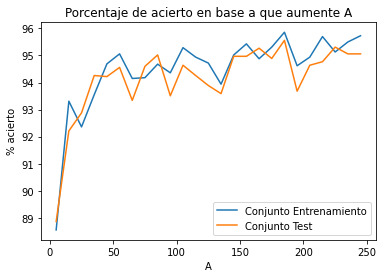

In [ ]:
plt.title('Porcentaje de acierto en base a que aumente A')
plt.ylabel('% acierto')
plt.xlabel('A')
plt.plot(listaA, resultadosTrain)
plt.plot(listaA, resultadosTest)
plt.legend(['Conjunto Entrenamiento', 'Conjunto Test'])

plt.show()

### **Prueba aumentando T**

La prueba que vamos a hacer ahora es en base a que la A es constante y la T irá aumentando, como podemos apreciar en la gráfica del apartado anterior vemos que con unas 50 A el acierto es bastante bueno, por lo que ese será el valor que tome A en esta prueba, por su parte T empezará en 5 y comenzaremos a aumentar de 5 en 5, esto lo repetiremos 20 veces.

In [ ]:
A = 50
T = 5

listaT = []
resultadosTest = []
resultadosTrain = []
for i in tqdm(range(20)):
    cf = adaboost(imagenesFinales, etiquetaFinales, T, A)
    res_train = aplicarClasificadorFuerte_Conjunto(cf, imagenesFinales, etiquetaFinales)
    res_test = aplicarClasificadorFuerte_Conjunto(cf, testX, testY)
    resultadosTrain.append(res_train)
    resultadosTest.append(res_test)
    listaT.append(T)
    T += 5

100%|██████████| 20/20 [20:21<00:00, 61.06s/it] 


Al igual que en el ejemplo anterior guardaremos los resultados para que no se pierdan al cerrar el cuaderno.

In [ ]:
listaT = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
resultadosTrain = [88.2, 91.49, 91.16, 94.14, 94.23, 93.75, 94.51, 95.39, 95.15, 95.77, 95.74, 95.52, 95.9, 96.05, 95.98, 96.44, 95.88, 96.71, 96.34, 96.36]
resultadosTest = [87.81, 91.5, 92.09, 93.38, 93.8, 93.59, 94.35, 94.89, 95.27, 95.14, 95.44, 95.06, 95.64, 95.02, 95.6, 96.15, 95.64, 96.11, 95.48, 95.9]

Ahora generamos las gráficas correspondientes.

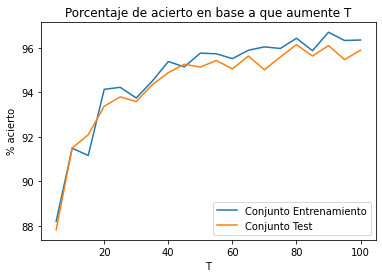

In [ ]:
plt.title('Porcentaje de acierto en base a que aumente T')
plt.ylabel('% acierto')
plt.xlabel('T')
plt.plot(listaT, resultadosTrain)
plt.plot(listaT, resultadosTest)
plt.legend(['Conjunto Entrenamiento', 'Conjunto Test'])

plt.show()

De la gráfica anterior podemos deducir que el valor "ideal" para T sería alrededor de 40, ya que vemos que nos da una tasa de acierto bastante elevada, vemos que también podríamos subirla hasta 100 consiguiendo una tasa de acierto muy alta pero el incoveniente sería que tardaría mucho en entrenar.

### **Prueba aumentado T y A**

Ahora probaremos a ir aumentando de manera gradual ambas variables, lo haremos que empiecen en 1 ambas y que aumenten de 1 en 1, porque si no, no sería viable su ejecución, lo ejecutaremos 50 veces para ver como evoluciona.

In [ ]:
A = 1
T = 1

listaT = []
resultadosTest = []
resultadosTrain = []
for i in tqdm(range(50)):
    cf = adaboost(imagenesFinales, etiquetaFinales, T, A)
    res_train = aplicarClasificadorFuerte_Conjunto(cf, imagenesFinales, etiquetaFinales)
    res_test = aplicarClasificadorFuerte_Conjunto(cf, testX, testY)
    resultadosTrain.append(res_train)
    resultadosTest.append(res_test)
    listaT.append(T)
    T += 1
    A += 1

100%|██████████| 50/50 [16:49<00:00, 20.19s/it]


Al igual que antes, guardamos los resultados.

In [ ]:
listaT = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
resultadosTrain = [50.84, 50.92, 60.86, 79.51, 64.45, 68.46, 77.08, 84.92, 84.56, 87.93, 90.95, 86.59, 90.15, 88.36, 91.56, 88.92, 91.29, 91.93, 89.9, 91.7, 91.55, 92.56, 93.51, 92.36, 93.26, 94.04, 93.31, 93.98, 94.24, 92.91, 94.02, 94.52, 94.08, 94.39, 94.84, 93.81, 94.6, 95.14, 93.57, 94.78, 95.47, 95.36, 95.37, 95.22, 95.73, 93.79, 95.29, 94.84, 95.51, 95.23]
resultadosTest = [51.01, 52.64, 59.21, 80.4, 63.02, 71.4, 77.72, 83.63, 85.18, 87.56, 91.25, 86.89, 90.08, 87.94, 91.37, 88.9, 90.95, 91.5, 90.08, 92.21, 91.96, 92.29, 93.47, 92.04, 93.55, 94.39, 93.8, 94.26, 94.26, 91.96, 94.1, 94.97, 94.35, 94.85, 94.6, 93.3, 94.26, 95.27, 94.05, 94.68, 95.23, 95.44, 94.72, 95.52, 95.94, 92.76, 96.11, 95.1, 94.6, 94.97]

## **Pruebas para todos los digitos**

### **Prueba Aumentando solo A**

Para esta primera prueba, vamos a aumentar sólo el valor de A, por su parte T será constante con un valor de 2, le daremos un valor de 20, la A aumentará de 1 en 1 hasta 30.

In [ ]:
A = 1
T = 2

clasificadoresSoloA = []
for i in range(10):
      clasificadoresSoloA.append([])

for i in tqdm(range(10)):
    (imagenesFinales, etiquetaFinales) = creaConjunto(imageTrain, labelTrain, i)
    for j in range(20):
        cf = adaboost(imagenesFinales, etiquetaFinales, T, A)
        clasificadoresSoloA[i].append(cf)
        A += 1

100%|██████████| 10/10 [14:55<00:00, 89.57s/it] 


Primero mostramos la grafica para los datos de entrenamiento.

In [ ]:
#Para Entrenamiento
resultadosSoloA_Train = []
for i in range(10):
    resultadosSoloA_Train.append([])

for i in range(10):
    (imagenesFinales, etiquetaFinales) = creaConjunto(imageTrain, labelTrain, i)
    for j in range(20):
        res = aplicarClasificadorFuerte_Conjunto(clasificadoresSoloA[i][j], imagenesFinales, etiquetaFinales)
        resultadosSoloA_Train[i].append(res)

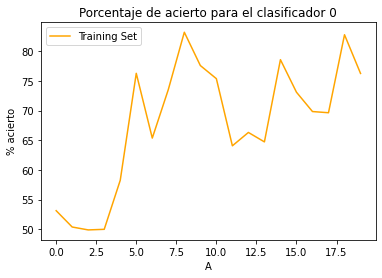

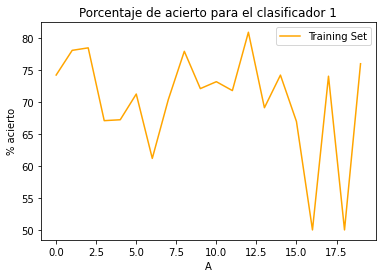

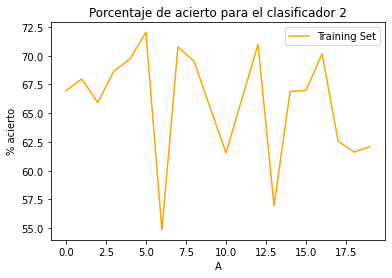

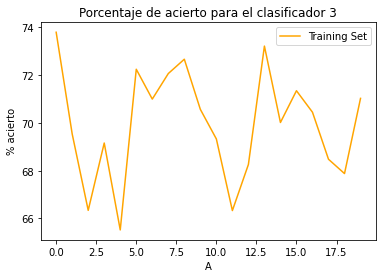

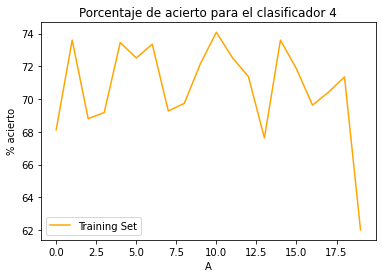

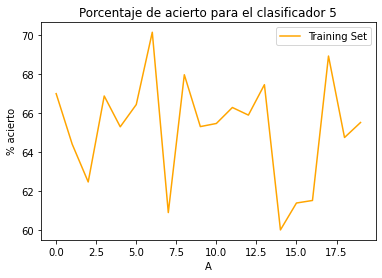

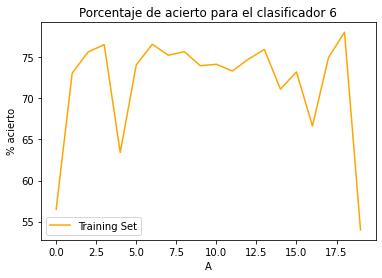

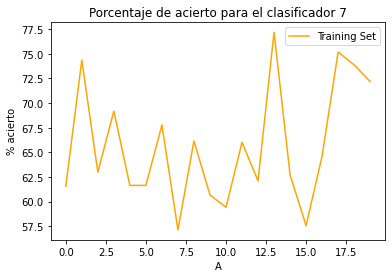

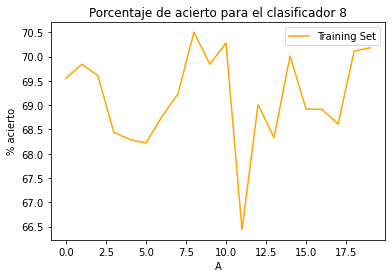

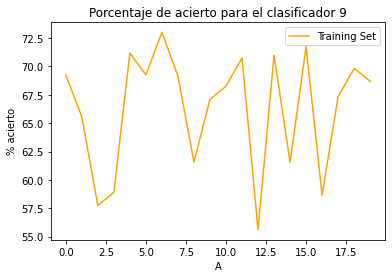

In [ ]:
#Graficas Training
for i in range(10):
    TListaAux = []
    for j in range(20):
        TListaAux.append(j)
    plt.title('Porcentaje de acierto para el clasificador ' + str(i))
    plt.ylabel('% acierto')
    plt.xlabel('A')
    plt.plot(TListaAux, resultadosSoloA_Train[i], color="orange")
    plt.legend(['Training Set'])
    plt.show()

Un a vez hemos mostrado los resultados con los conjuntos de entrenamiento, procedemos a mostrar los resultados con el conjunto de test.

In [ ]:
#Para Test
resultadosSoloA_Test = []
for i in range(10):
    resultadosSoloA_Test.append([])

for i in range(10):
    (imagenesTest, etiquetasTest) = creaConjunto(imageTest, labelTest, i)
    for j in range(20):
        res = aplicarClasificadorFuerte_Conjunto(clasificadoresSoloA[i][j], imagenesTest, etiquetasTest)
        resultadosSoloA_Test[i].append(res)

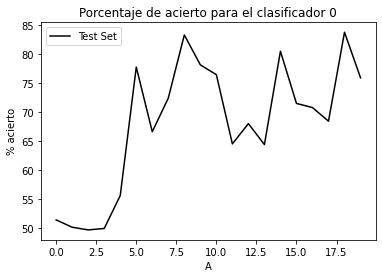

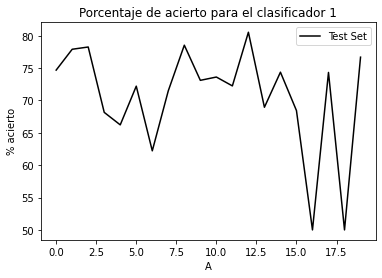

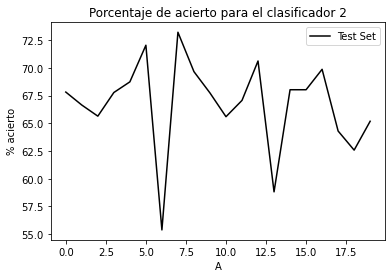

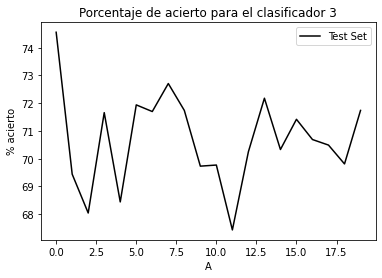

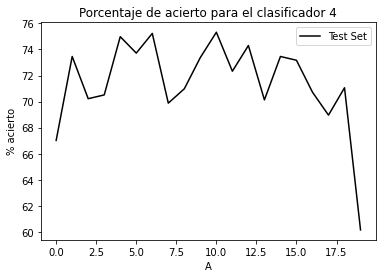

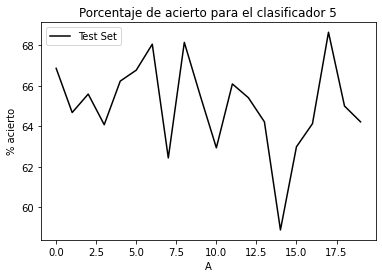

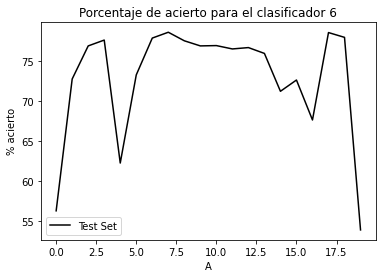

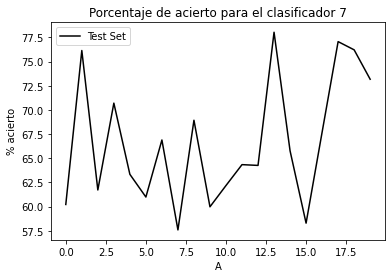

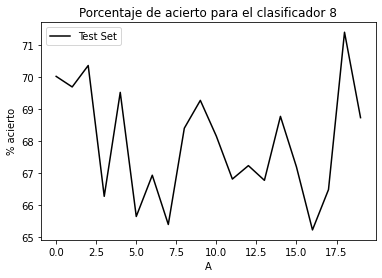

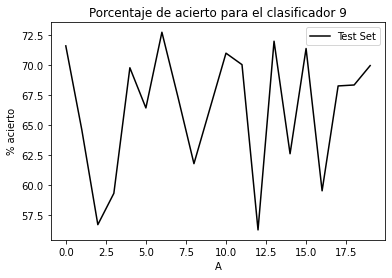

In [ ]:
for i in range(10):
    TListaAux = []
    for j in range(20):
        TListaAux.append(j)
    plt.title('Porcentaje de acierto para el clasificador ' + str(i))
    plt.ylabel('% acierto')
    plt.xlabel('A')
    plt.plot(TListaAux, resultadosSoloA_Test[i], color="black")
    plt.legend(['Test Set'])
    plt.show()

Finalmente, mostramos las gráficas superpuestas, tanto con el conjunto de entrenamiento como el de validación.

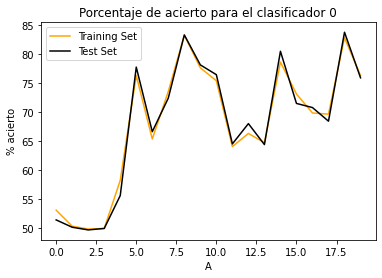

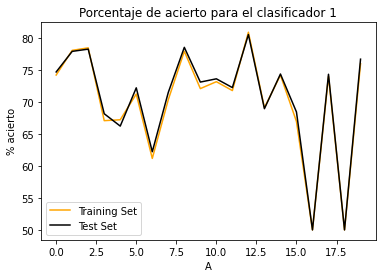

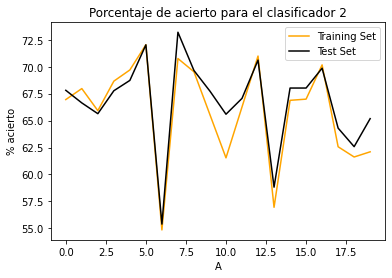

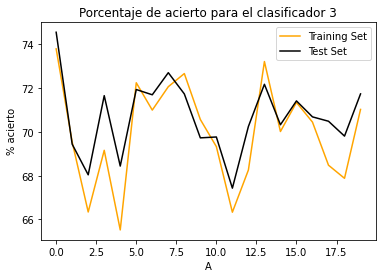

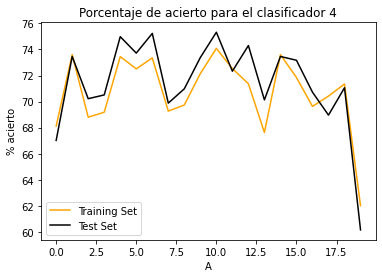

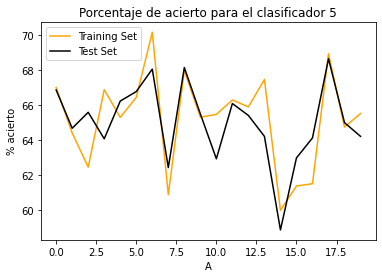

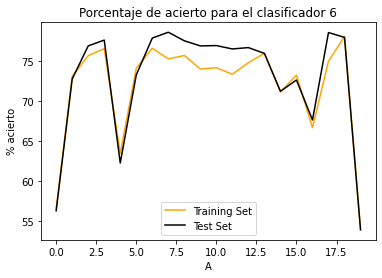

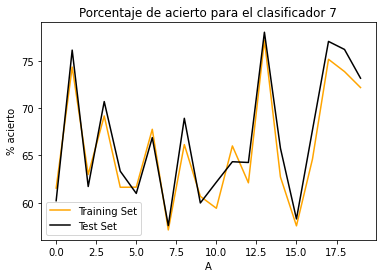

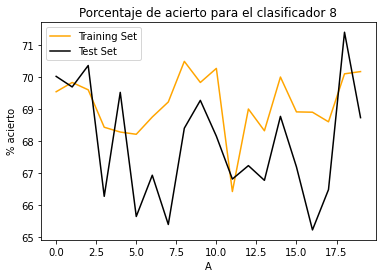

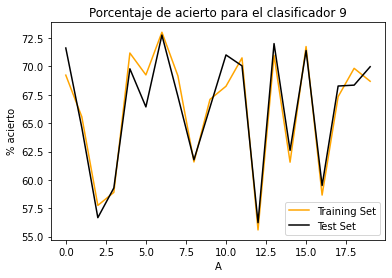

In [ ]:
for i in range(10):
    TListaAux = []
    for j in range(20):
        TListaAux.append(j)
    plt.title('Porcentaje de acierto para el clasificador ' + str(i))
    plt.ylabel('% acierto')
    plt.xlabel('A')
    plt.plot(TListaAux, resultadosSoloA_Train[i], color="orange")
    plt.plot(TListaAux, resultadosSoloA_Test[i], color="black")
    plt.legend(['Training Set', 'Test Set'])
    plt.show()

# **Cuestiones**

## **Explica brevemente cómo has adaptado la base datos MNIST al algoritmo AdaBoost.**

Este apartado ya lo hemos explicado anteriormente, pero en resumen, tendremos que descargar el conjunto de entrenamiento de forma dinámica usando **Keras**, una vez hemos descargado esos conjuntos tenemos dos conjuntos, el de entrenamiento y el de test, el de test no lo usaremos.

El conjunto de entrenamiento se compone de 60000 imágenes, cada imagen de este conjunto es una matriz de 28 píxeles de ancho y 28 de alto. La adaptación es importante porque nuestro programa trata las imágenes como si fuesen vectores en vez de una matriz, por lo que tenemos que aplanar la matriz, para ello empleamos la siguiente función.

>conjuntoX_Adaptado = mnist_X.reshape(60000, 28*28)

Al conjuntoY no hay que tocar nada, solo devolver una copia.

## **Comenta detalladamente el funcionamiento de AdaBoost teniendo en cuenta que tasa media de fallos obtienes para aprendizaje y test. Correlaciona los porcentajes de acierto y de fallo con los valores de A y de T**

Ya hemos comentado anteriormente AdaBoost de manera detallada, me voy a limitar a comentar la correlación.

Existe una fuerte correlación entre los valores que le damos a A y T con el acierto y fallo del modelo, asi pues si tenemos valores bajos de T y A el modelo se comportará como si tirasemos una modena al aire, a medida que aumentemos dichos valores, el modelo comienza a mejorar su tasa de acierto, cuanto mayor será estos valores mejor funcionará aunque un incoveniente es que tardará en entrenar.

En la siguiente gráfica vemos esto, esta prueba la hize para el tema del analisis pero se puede ver lo que comentamos.

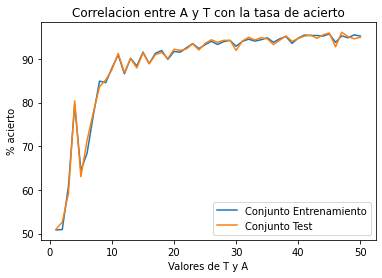

In [ ]:
numT_A = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
resultadosTrain = [50.84, 50.92, 60.86, 79.51, 64.45, 68.46, 77.08, 84.92, 84.56, 87.93, 90.95, 86.59, 90.15, 88.36, 91.56, 88.92, 91.29, 91.93, 89.9, 91.7, 91.55, 92.56, 93.51, 92.36, 93.26, 94.04, 93.31, 93.98, 94.24, 92.91, 94.02, 94.52, 94.08, 94.39, 94.84, 93.81, 94.6, 95.14, 93.57, 94.78, 95.47, 95.36, 95.37, 95.22, 95.73, 93.79, 95.29, 94.84, 95.51, 95.23]
resultadosTest = [51.01, 52.64, 59.21, 80.4, 63.02, 71.4, 77.72, 83.63, 85.18, 87.56, 91.25, 86.89, 90.08, 87.94, 91.37, 88.9, 90.95, 91.5, 90.08, 92.21, 91.96, 92.29, 93.47, 92.04, 93.55, 94.39, 93.8, 94.26, 94.26, 91.96, 94.1, 94.97, 94.35, 94.85, 94.6, 93.3, 94.26, 95.27, 94.05, 94.68, 95.23, 95.44, 94.72, 95.52, 95.94, 92.76, 96.11, 95.1, 94.6, 94.97]

plt.title('Correlacion entre A y T con la tasa de acierto')
plt.ylabel('% acierto')
plt.xlabel('Valores de T y A')
plt.plot(numT_A, resultadosTrain)
plt.plot(numT_A, resultadosTest)
plt.legend(['Conjunto Entrenamiento', 'Conjunto Test'])

plt.show()

## **¿Cuál es el número de clasificadores que se han de generar para que un clasificador débil funcione? Muestra una gráfica que permita verificar lo que comentas**

He deducido que a partir de 50 A la tasa de acierto aumenta poco a poco, antes de ese valor, el acierto puede tener picos y en ocasiones dar muy bajo, cuantas mayor valor de A más región de la imagen conocemos, es decir, esto es bueno, ya que se podría dar el caso de elegir un pixel que esté en una esquina por ejemplo.

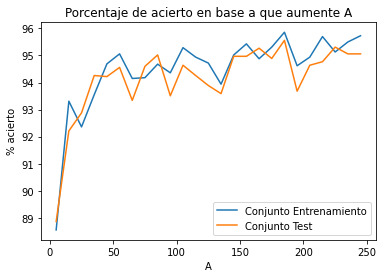

In [2]:
import matplotlib.pyplot as plt
listaA = [5, 15, 25, 35, 45, 55, 65, 75, 85, 95, 105, 115, 125, 135, 145, 155, 165, 175, 185, 195, 205, 215, 225, 235, 245]
resultadosTrain = [88.55, 93.31, 92.36, 93.55, 94.69, 95.06, 94.15, 94.18, 94.68, 94.36, 95.29, 94.94, 94.72, 93.94, 95.02, 95.43, 94.88, 95.31, 95.86, 94.62, 94.94, 95.7, 95.13, 95.5, 95.73]
resultadosTest = [88.86, 92.21, 92.88, 94.26, 94.22, 94.56, 93.34, 94.6, 95.02, 93.51, 94.64, 94.26, 93.89, 93.59, 94.97, 94.97, 95.27, 94.89, 95.56, 93.68, 94.64, 94.77, 95.31, 95.06, 95.06]
plt.title('Porcentaje de acierto en base a que aumente A')
plt.ylabel('% acierto')
plt.xlabel('A')
plt.plot(listaA, resultadosTrain)
plt.plot(listaA, resultadosTest)
plt.legend(['Conjunto Entrenamiento', 'Conjunto Test'])

plt.show()

## **¿Cómo afecta el número de clasificadores generados al tiempo empleado para el proceso de aprendizaje? ¿Qué importancia le darías? Justifica tu respuesta.**

A medidas que aumentamos el número de clasificadores débiles que tienen que formar un clasificador fuerte, T, hará que el tiempo aumente, aunque este tiempo también de A, ya que esto indica el numero de pruebas aleatorias que tenemos que realizar para elegir el mejor clasificador débil, esto se traduce en que realizaremos más iteraciones.

En resumen, es importante elegir un numero razonable de A y T que nos permita tener una buena tasa de acierto, ya que si estos valores son muy grandes, entonces el tiempo que tengamos que entrenar será mayor.

## **¿Cómo has dividido los datos en conjunto de entrenamiento y test? ¿Para qué es útil hacer esta división?**

La división la he hecho basándonos en un porcentaje, usaré un 80% para entrenamiento mientras que el 20% restante lo usaremos para test, aunque está división también se puede hacer usando otros porcentajes, lo vemos en la siguiente tabla.

|       | Training | Testing |
|-------|----------|---------|
| Set 1 | 80%      | 20%     |
| Set 2 | 90%      | 10%     |
| Set 3 | 70%      | 30%     |

La utilidad de la división del conjunto es que de esta forma podemos utilizar todas las imágenes que nos brinda el conjunto, si entrenásemos con todas las imágenes, luego para probar el funcionamiento del algoritmo tendríamos que buscar nuevas imágenes en Internet, esto supondría una tarea bastante compleja, ya que habría que mirar imágenes que se correspondan con el tipo de imágenes que nosotros empleamos.

## **¿Has observado si se produce sobre entrenamiento? Justifica tu respuesta con una gráfica en la que se compare el error de entrenamiento y el de test a lo largo de las ejecuciones.**

Antes que nada, tenemos que comentar que es el sobreentrenamiento, este concepto ocurre cuando para un modelo entrenamos demasiado, valga la redundancia, lo que quiero decir es que el modelo se adapta muy bien al conjunto de entrenamiento, pero el problema viene que a medida que más entrenamos, por lo que llegará un momento cuando probemos con nuevos datos y el acierto de nuestro modelo comience a deteriorarse.

No he conseguido ver si se produce sobreentrenamiento, ya que para que el sobreentrenamiento se produzca tendríamos que emplear unos valores de A y de T muy altos, por lo que no he llegado a presenciarlo, ya que tendríamos que esperar mucho tiempo para ver si ocurre.

In [ ]:
#NO EJECUTAR, YA SE HAN GUARDADO LOS VALORES EN LA SIGUIENTE CELDA
T = 100
A = 100
cf = adaboost(imagenesFinales, etiquetaFinales, T, A)

100%|██████████| 50/50 [01:55<00:00,  2.30s/it]


In [ ]:
#NO EJECUTAR, YA SE HAN GUARDADO LOS VALORES EN LA SIGUIENTE CELDA
aplicarClasificadorFuerte_Conjunto(cf, imagenesFinales, etiquetaFinales)
aplicarClasificadorFuerte_Conjunto(cf, testX, testY)

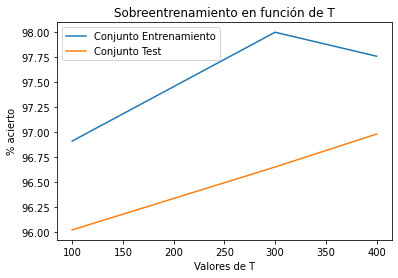

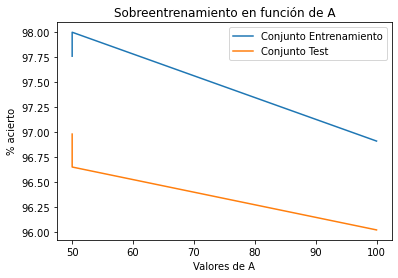

In [ ]:
aciertosTrain = [96.91, 98, 97.76]
aciertosTest = [96.02, 96.65, 96.98]

Ts = [100, 300, 400]
As = [100, 50, 50]

plt.title('Sobreentrenamiento en función de T')
plt.ylabel('% acierto')
plt.xlabel('Valores de T')
plt.plot(Ts, aciertosTrain)
plt.plot(Ts, aciertosTest)
plt.legend(['Conjunto Entrenamiento', 'Conjunto Test'])

plt.show()

plt.title('Sobreentrenamiento en función de A')
plt.ylabel('% acierto')
plt.xlabel('Valores de A')
plt.plot(As, aciertosTrain)
plt.plot(As, aciertosTest)
plt.legend(['Conjunto Entrenamiento', 'Conjunto Test'])

plt.show()

## **¿Cómo has conseguido que Adaboost clasifique entre los 10 dígitos cuando solo tiene una salida binaria?**

Para distinguir entre los 10 digitos posibles tenemos que generar 10 clasificadores fuertes para cada digito posible, los tenemos que entrenar, ahora tras pasarle una imagen al azar lo que hacemos es aplicarle los diez clasificadores fuertes.

En primer lugar, vamos a elegir 10 imagenes al azar de todo el conjunto de entrenamiento.
Devolvemos las imagenes y sus etiquetas correspondientes.

In [ ]:
def crearImagenesAzar(X, Y):
    imagenes = []
    etiquetas = []
    N = len(X)
    for i in range(10):
        pos = random.randint(0, N-1)
        imagenes.append(X[pos])
        etiquetas.append(Y[pos])
    
    return (imagenes, etiquetas)

Ahora adaptamos la función de aplicar clasificador fuerte, en este caso le pasamos todos los clasificadores fuertes y una imagen, la idea de esto es recorrer cada clasificador fuerte y sacar su juicio de valor sobre la imagen que hemos pasado por parámetro.

Entendemos como juicio de valor a la suma de aplicar el clasificador débil por su confianza, este valor tenemos que ir acumulándolo, tenemos que ir quedándonos la posición del mayor e ir actualizando el mejor juicio de valor.

La posición la entendemos como la categoría a la que pertenece la imagen que le hemos pasado por parámetro.

In [ ]:
def aplicarClasificadorFuerteImagen_Prueba(clasificadoresFuertes, img):
    categoria = -1
    contadorAciertos = -1    
    for i, cf in enumerate(clasificadoresFuertes):
        [debiles, alphas] = cf
        aciertos = 0
        for j, deb in enumerate(debiles):
            aciertos += alphas[j] * aplicar_clasificador_debil(deb, img)
        if aciertos > contadorAciertos:
            contadorAciertos = aciertos
            categoria = i
    return categoria

Ahora entrenamos para cada digito, de manera que tendremos 10 clasificadores fuertes.

In [ ]:
T = 50
A = 50

clasificadores = []
for i in range(10):
    (imagenesFinales, etiquetaFinales) = creaConjunto(imageTrain, labelTrain, i)
    cf = adaboost(imagenesFinales, etiquetaFinales, T, A)
    clasificadores.append(cf)

100%|██████████| 50/50 [01:00<00:00,  1.20s/it]


Ahora creamos las imágenes y etiquetas al azar, en total serán 10. Lo que hacemos es recorrer es el vector de imágenes generadas, en cada iteración calculamos la categoría (o etiqueta) con la función que hemos explicado anteriormente, luego comprobamos si la categoría coincide con la etiqueta real aumentamos los aciertos.

Finalmente, mostramos el porcentaje de acierto de esta prueba.

In [ ]:
(imagenesDiezRandom, etiquetasDiezRandom) = crearImagenesAzar(X, Y)
aciertos = 0
for i in range(len(imagenesDiezRandom)):
    categoria = -1
    categoria = aplicarClasificadorFuerteImagen_Prueba(clasificadores, imagenesDiezRandom[i])
    if categoria == etiquetasDiezRandom[i]:
        aciertos += 1
    print("Prediccion -> ", categoria, " Real -> ", etiquetasDiezRandom[i])

print("Tasa acierto -> ", aciertos/len(imagenesDiezRandom) * 100)

Prediccion ->  2  Real ->  2
Prediccion ->  3  Real ->  3
Prediccion ->  1  Real ->  1
Prediccion ->  3  Real ->  3
Prediccion ->  2  Real ->  2
Prediccion ->  6  Real ->  6
Prediccion ->  3  Real ->  3
Prediccion ->  5  Real ->  5
Prediccion ->  8  Real ->  8
Prediccion ->  0  Real ->  0
Tasa acierto ->  100.0


Finalmente, me gustaría hacer una especie de prueba, donde ejecutaremos la celda anterior muchas veces para que la muestra esté normalizada, de esta forma evitamos el factor de aleatoriedad.

Si lo ejecutamos varias veces vemos que el porcentaje de acierto suele mantenrse estable alrededor del 70%.

In [ ]:
aciertos = 0
numeroPruebas = 1000
for x in tqdm(range(numeroPruebas)):
    (imagenesDiezRandom, etiquetasDiezRandom) = crearImagenesAzar(X, Y)
    for i in range(len(imagenesDiezRandom)):
        categoria = -1
        categoria = aplicarClasificadorFuerteImagen_Prueba(clasificadores, imagenesDiezRandom[i])
        if categoria == etiquetasDiezRandom[i]:
            aciertos += 1

#Sacamos el porcentaje de acierto
tasa =  aciertos / len(imagenesDiezRandom) * 100
tasa /= numeroPruebas

print("\nTasa ->", tasa)

100%|██████████| 1000/1000 [00:13<00:00, 72.16it/s]


Tasa -> 81.74
